# Proyecto Ciencia de datos en Python
##### Import de las librerias necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn import metrics

##### Carga de datos de proyecto_training_data.npy

In [2]:
dataSet = np.load('proyecto_data/proyecto_training_data.npy')

##### Repartir el set de datos

In [3]:
#80% del set
trainingSet = dataSet[:int(len(dataSet)*0.8)]
#20% del set
testSet = dataSet[len(trainingSet):]
len(dataSet)==(len(trainingSet) + len(testSet))

True

## Analisis exploratorio
### Setup

In [4]:
means = np.nanmean(dataSet,axis=0)
maxs = np.nanmax(dataSet,axis=0)
mins = np.nanmin(dataSet,axis=0)
ranges = maxs - mins
stdDevs = np.nanstd(dataSet,axis=0)
def printVariableInfo(index):
    sb.distplot(dataSet[:,index])
    plt.show()

    print("media: " + str(means[index]))
    print("valor maximo: " + str(maxs[index]))
    print("valor minimo: " + str(mins[index]))
    print("rango, peak to peak: " + str(ranges[index]))
    print("desviacion estandar:  " + str(stdDevs[index]))
    
def visualCorr(x,y,xlabel,ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.scatter(x=x, y=y)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title('Correlation: ' + str(np.corrcoef(x,y)[1,0]))

    plt.show()

### SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

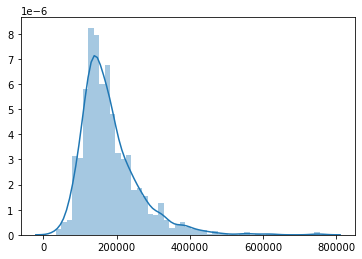

media: 180921.19589041095
valor maximo: 755000.0
valor minimo: 34900.0
rango, peak to peak: 720100.0
desviacion estandar:  79415.29188606751


In [5]:
printVariableInfo(0)

### OverallQual: Overall material and finish quality, rates the overall material and finish of the house

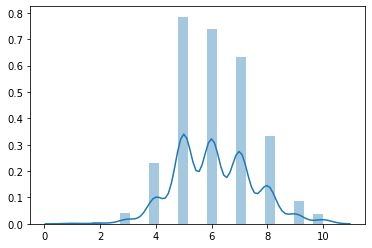

media: 6.0993150684931505
valor maximo: 10.0
valor minimo: 1.0
rango, peak to peak: 9.0
desviacion estandar:  1.3825228366585953


In [6]:
printVariableInfo(1)

### 1stFlrSF: First Floor square feet

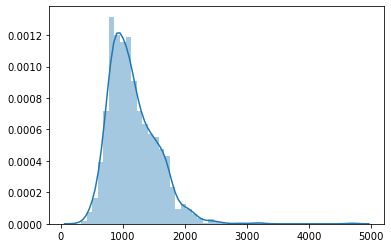

media: 1162.626712328767
valor maximo: 4692.0
valor minimo: 334.0
rango, peak to peak: 4358.0
desviacion estandar:  386.45532230228963


In [7]:
printVariableInfo(2)

### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

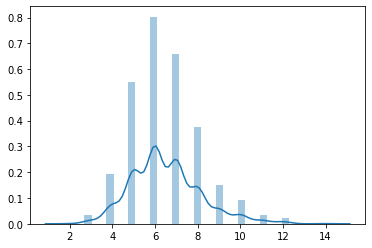

media: 6.517808219178082
valor maximo: 14.0
valor minimo: 2.0
rango, peak to peak: 12.0
desviacion estandar:  1.624836553698191


In [8]:
printVariableInfo(3)

### YearBuilt: Original construction date

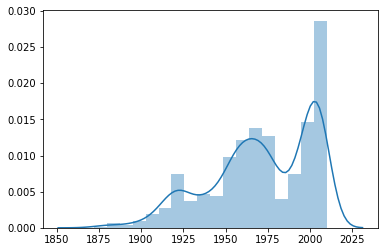

media: 1971.267808219178
valor maximo: 2010.0
valor minimo: 1872.0
rango, peak to peak: 138.0
desviacion estandar:  30.192558810489448


In [9]:
printVariableInfo(4)

### LotFrontage: Linear feet of street connected to property

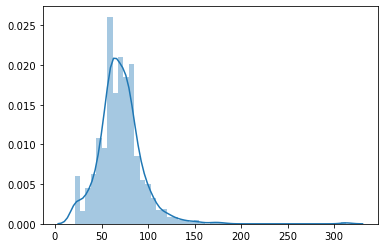

media: 70.04995836802665
valor maximo: 313.0
valor minimo: 21.0
rango, peak to peak: 292.0
desviacion estandar:  24.27463944767604


In [10]:
printVariableInfo(5)

### Visualizacion SalePrice vs OverallQual

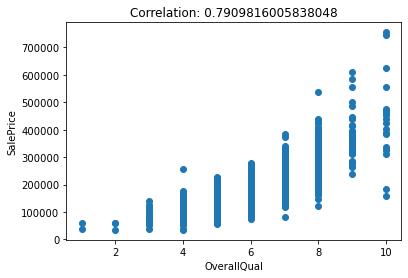

In [11]:
cSalePrice = dataSet[:,0]
cOverallQual = dataSet[:,1]
visualCorr(cOverallQual,cSalePrice,'OverallQual','SalePrice')

### Visualizacion SalePrice vs 1stFlrSF

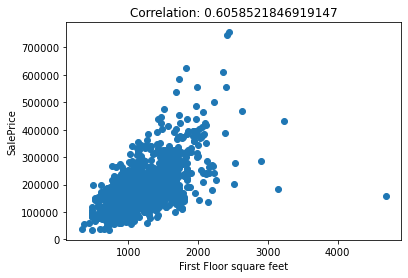

In [12]:
c1stFlrSF = dataSet[:,2]
visualCorr(c1stFlrSF,cSalePrice,'First Floor square feet','SalePrice')

### Visualizacion SalePrice vs TotRmsAbvGrd

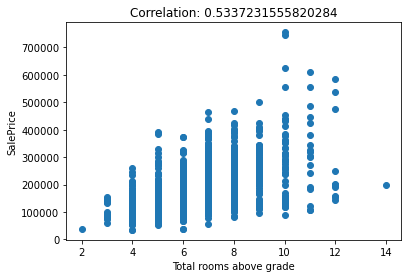

In [13]:
cTotRmsAbvGrd = dataSet[:,3]
visualCorr(cTotRmsAbvGrd,cSalePrice,'Total rooms above grade','SalePrice')

### Visualizacion SalePrice vs YearBuilt

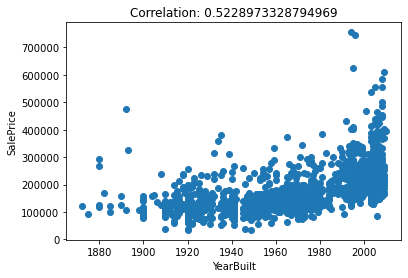

In [14]:
cYearBuilt = dataSet[:,4]
visualCorr(cYearBuilt,cSalePrice,'YearBuilt','SalePrice')

### Visualizacion SalePrice vs LotFrontage

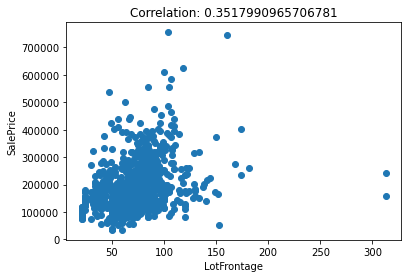

In [15]:
cLotFrontage = dataSet[:,5]
visualCorr(cLotFrontage[~np.isnan(cLotFrontage)],cSalePrice[~np.isnan(cLotFrontage)],'LotFrontage','SalePrice')

### Eleccion:
Se eligieron las dos variables con mayor correlacion a SalePrice
* SalePrice vs OverallQual
* SalePrice vs 1stFlrSF

## Funciones para entrenar modelo lineal

In [16]:
'''
Funcion que calcula el error para x1 y x2 utilizando la formula:
* error=0.5*promedio((x1-x2)^2)
'''
def errorDis(x1,x2):
    return (0.5*np.sum(np.power(x2-x1,2)))/len(x1)

'''
Funcion que aplica un modelo a un Dataset
'''
def aplicarModeloaDataSet(x,modelo):
    x2 = np.hstack((x,np.ones_like(x)))
    return np.matmul(x2,modelo)

'''
Funcion que devuleve el modelo resultante usando sklearn
'''
def modeloSK(x1,x2):
    reg = LinearRegression().fit(x1, x2)
    error = errorDis( x2, reg.predict(x1))
    model = np.array([reg.coef_,reg.intercept_])
    return model, error

'''
Funcion que grafica el error para cada iteracion
'''
def plotError(error,title):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.plot(range(1,len(error)+1), error)

    ax.set_xlabel("Iteraciones")
    ax.set_ylabel("Error")
    ax.set_title(title)

    plt.show()
    
def plotModel(x,y,model,title,xlabel,ylabel="Precios dividido en 10 mil"):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    ax.scatter(x=x, y=y)
    ax.plot(x, aplicarModeloaDataSet(x,model),'r')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    plt.show()

'''
Funcion que grafica el modelo cada n iteraciones
'''
def plotNModel(x,y,model,n,title,xlabel,ylabel="Precios dividido en 10 mil"):
    
    for i in range(len(model)):
        if ((i%n)==0):
            plotModel(x,y,model[i],title + ", iteracion: " + str(i),xlabel,ylabel)
    plotModel(x,y,model[-1],title + ", iteracion: " + str(len(model)),xlabel,ylabel)

'''
Funcion que crea un modelo para y = mx +b
* vector con la variable independiente “x” ,
* vector con la variable dependiente “y”,
* un entero “epochs” que indica por cuantas iteraciones entrenar el modelo.
* un entero “imprimir_error_cada” , que nos indica cada cuantas iteraciones
* escalar lr(learning rate)
* es posible pasar una pendiante e intercepto inicial
'''
def entrenarModeloLineal(x,y,epochs,imprimir_error_cada, lr,m=1,b=0):
    
    itModel=[]
    itError=[]
    resultVector = np.array([[m],[b]])
    
    for i in range(1, epochs + 1):
        y_hat = aplicarModeloaDataSet(x,resultVector)
        error = errorDis(y,y_hat)
        
        if ((i%imprimir_error_cada)==0 or i==1):
            print("["+str(i)+"] error: " + str(error))
        
        tempy_hat = y_hat - y
        tempMatrix = np.vstack((x.reshape(1,len(x)),np.ones(len(x))))
        
        gradient = np.matmul(tempMatrix,tempy_hat)/len(y_hat)
        
        resultVector = resultVector - lr * gradient
        
        itModel.append(np.copy(resultVector))
        itError.append(error)
        
    return itModel, itError
        
#y de entrenamiento, convertir a vector escalado 1/10000
yTestSalePrice = trainingSet[:,0].reshape(-1,1)/10000
#x de entrenamiento para OverallQual, convertir a vector
xTestOverallQual = trainingSet[:,1].reshape(-1,1)
#x de entrenamiento para 1stFlrSF, convertir a vector
xTest1stFlrSF = trainingSet[:,2].reshape(-1,1)

## Entrenamiento de modelo para SalePrice vs OverallQual

[1] error: 94.86238465892978
[50000] error: 11.471141640948222
[100000] error: 11.469163823991568
Resultado modelo: [[ 4.53992005]
 [-9.63876079]]
Resultado error: 11.469163823991568


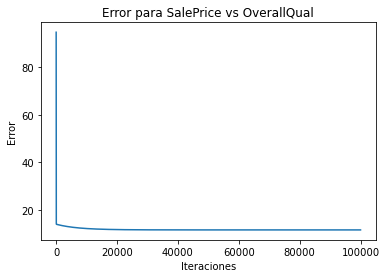

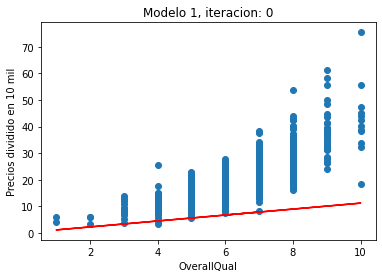

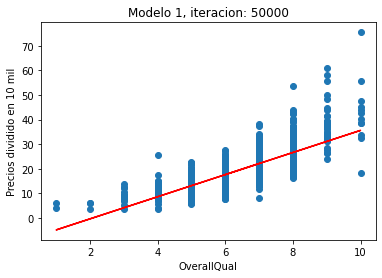

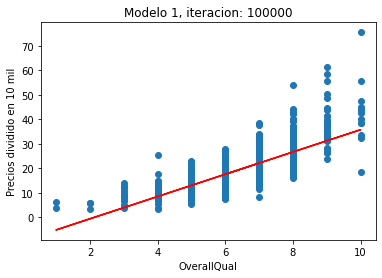

In [17]:
modelo1, error1 = entrenarModeloLineal(xTestOverallQual,yTestSalePrice,100000,50000, 0.0015)
print("Resultado modelo: " + str(modelo1[-1]))
print("Resultado error: " + str(error1[-1]))

plotError(error1,"Error para SalePrice vs OverallQual")
plotNModel(xTestOverallQual,yTestSalePrice,modelo1,50000,"Modelo 1","OverallQual")

## Entrenamiento de modelo para SalePrice vs First Floor Surface Area

[1] error: 715836.2442127411
[100000] error: 19.67706392751593
[200000] error: 19.673010941689466
[300000] error: 19.66899608872208
Resultado modelo: [[0.01533688]
 [0.04193572]]
Resultado error: 19.66899608872208


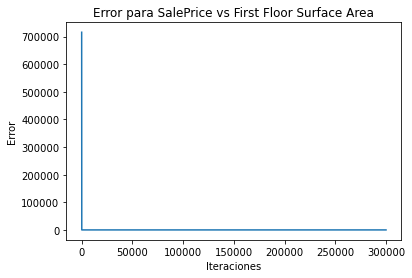

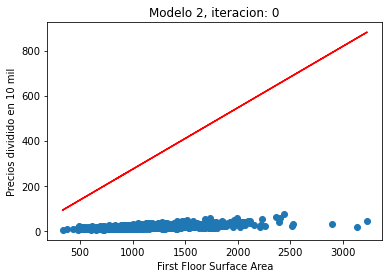

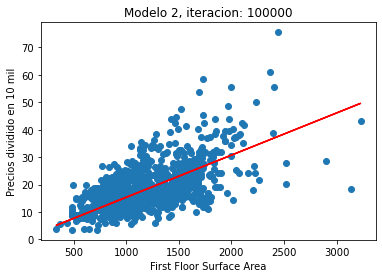

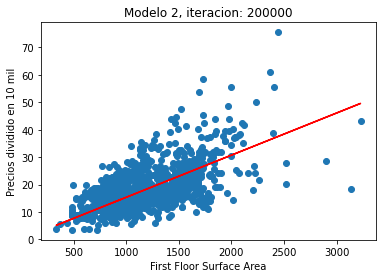

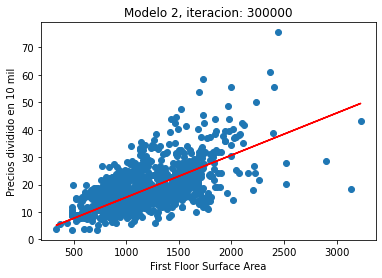

In [18]:
#y de entrenamiento, convertir a vector escalado 1/10000
yTestSalePrice = trainingSet[:,0].reshape(-1,1)/10000
xTest1stFlrSF = trainingSet[:,2].reshape(-1,1)
modelo2, error2 = entrenarModeloLineal(xTest1stFlrSF,yTestSalePrice,300000,100000, 0.0000005)
print("Resultado modelo: " + str(modelo2[-1]))
print("Resultado error: " + str(error2[-1]))

plotError(error2,"Error para SalePrice vs First Floor Surface Area")
plotNModel(xTest1stFlrSF,yTestSalePrice,modelo2,100000,"Modelo 2","First Floor Surface Area")

## Entrenar modelos SciKit para los dos modelos
### SalePrice vs OverallQual

In [19]:
print("Modelo SciKit")
modeloSK1 = modeloSK(xTestOverallQual,yTestSalePrice)[0]
print("m: " + str(modeloSK1[0]) + "b: " + str(modeloSK1[1]))
print("Modelo Entrenado Manualmente")
modeloM1 = modelo1[-1]
print("m: " + str(modeloM1[0]) + "b: " + str(modeloM1[1]))
print(modeloSK1)
print(modeloM1)

Modelo SciKit
m: [4.541199877915916]b: [-9.646957131873986]
Modelo Entrenado Manualmente
m: [4.53992005]b: [-9.63876079]
[[4.541199877915916]
 [-9.646957131873986]]
[[ 4.53992005]
 [-9.63876079]]


### SalePrice vs First Floor Surface Area

In [20]:
print("Modelo SciKit")
modeloSK2 = modeloSK(xTest1stFlrSF,yTestSalePrice)[0]
print("m: " + str(modeloSK2[0]) + "b: " + str(modeloSK2[1]))
print("Modelo Entrenado Manualmente")
modeloM2 = modelo2[-1]
print("m: " + str(modeloM2[0]) + "b: " + str(modeloM2[1]))

Modelo SciKit
m: [0.01299512422871572]b: [3.0324585174963605]
Modelo Entrenado Manualmente
m: [0.01533688]b: [0.04193572]


## Predicciones

In [21]:
def probarModelo(x,modelo1,modelo2):
    rModelo1 = aplicarModeloaDataSet(x,modelo1)
    rModelo2 = aplicarModeloaDataSet(x,modelo2)
    rModelo3 = (rModelo1 + rModelo2)/2
    return rModelo1, rModelo2, rModelo3


## Test de los Modelos
### SalePrice vs OverallQual

In [22]:
#y de entrenamiento, convertir a vector escalado 1/10000
yTestSP = testSet[:,0].reshape(-1,1)/10000
#x de entrenamiento para OverallQual, convertir a vector
xTestOQ = testSet[:,1].reshape(-1,1)
rM1Manual, rM1SK, rM1Mean = probarModelo(xTestOQ, modeloM1, modeloSK1)
print("Error de modelo entrenado manualmente")
errM1Manual = errorDis(yTestSP, rM1Manual)
print(errM1Manual)
print("Error de modelo de SciKit")
errM1SK = errorDis(yTestSP, rM1SK)
print(errM1SK)
print("Error de modelo promedio")
errM1Mean = errorDis(yTestSP, rM1Mean)
print(errM1Mean)

Error de modelo entrenado manualmente
13.15086410355351
Error de modelo de SciKit
13.150913044743188
Error de modelo promedio
13.150888151413334


### SalePrice vs First Floor Surface Area

In [23]:
#y de entrenamiento, convertir a vector escalado 1/10000
yTestSP = testSet[:,0].reshape(-1,1)/10000
#x de entrenamiento para OverallQual, convertir a vector
xTestOQ = testSet[:,2].reshape(-1,1)
rM2Manual, rM2SK, rM2Mean = probarModelo(xTestOQ, modeloM2, modeloSK2)
print("Error de modelo entrenado manualmente")
errM2Manual = errorDis(yTestSP, rM2Manual)
print(errM2Manual)
print("Error de modelo de SciKit")
errM2SK = errorDis(yTestSP, rM2SK)
print(errM2SK)
print("Error de modelo promedio")
errM2Mean = errorDis(yTestSP, rM2Mean)
print(errM2Mean)

Error de modelo entrenado manualmente
24.351561718623117
Error de modelo de SciKit
22.927691373459364
Error de modelo promedio
23.50559335671444


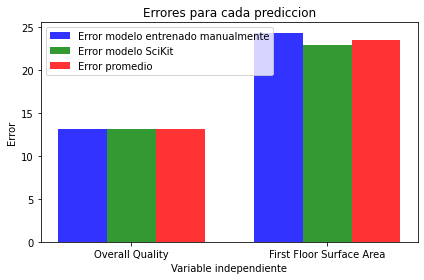

In [24]:
# data to plot
n_groups = 2
errManual = (errM1Manual, errM2Manual)
errSK = (errM1SK, errM2SK)
errMean = (errM1Mean, errM2Mean)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, errManual, bar_width,
alpha=opacity,
color='b',
label='Error modelo entrenado manualmente')

rects2 = plt.bar(index + bar_width, errSK, bar_width,
alpha=opacity,
color='g',
label='Error modelo SciKit')

rects3 = plt.bar(index + 2*bar_width, errMean, bar_width,
alpha=opacity,
color='r',
label='Error promedio')

plt.xlabel('Variable independiente')
plt.ylabel('Error')
plt.title('Errores para cada prediccion')
plt.xticks(index + bar_width, ('Overall Quality', 'First Floor Surface Area'))
plt.legend()

plt.tight_layout()
plt.show()

### Conclusiones
* Para la variable Overall Quality, el modelo entrenado manualmente es mejor ya que su error es ligeramente menor al modelo promedio y el modelo entrenado manualmente
* Para la variable First Floor Surface Area, el modelo creado utilizando SciKit es mejor ya que su error es menor al modelo promedio y el modelo entrenado manualmente